In [1]:
import numpy as np
import shared_functions as sf
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt
#HTML('<iframe src="https://www.geogebra.org/classic/bewyhuu6?embed" width="600" height="400" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>')

So now we have a way to calculate area from points: Meister's Formula!

$$ s(\widetilde{A_1A_2A_3A_4})=s(\widetilde{A_1A_2})+s(\widetilde{A_2A_3})+s(\widetilde{A_3A_4}+s(\widetilde{A_4A_1})\\=\frac12(x_1y_2-y_1x_2)+\frac12(x_2y_3-y_2x_3)+\frac12(x_3y_4-y_3x_4)+\frac12(x_4y_1-y_4x_1))\\=\frac{1}{2}(x_1y_2-y_1x_2+x_2y_3-y_2x_3+x_3y_4-y_3x_4+x_4y_1-y_4x_1).  $$


Before moving on, let's change the semantics a little in the python functions, just to make it clear that we are really dealing with a formula that takes some pointnd returns and signed area. Under the hood, vectors are in play, we are dealing directly with points.

In [97]:
def compute_cross_product_from_two_points(points_list):
    c = points_list[0][0] * points_list[1][1] - points_list[0][1] * points_list[1][0]
    return(c)

def compute_signed_area_of_triangle_from_two_points(points_list):
    c = compute_cross_product_from_two_points(points_list)
    signed_area = c / 2
    return(signed_area)

def compute_signed_area_using_meisters_formula(points_list):

    total_signed_area = 0
    for each_point in range(len(points_list) - 1):
        signed_area = compute_signed_area_of_triangle_from_two_points([points_list[each_point], points_list[each_point + 1]])
        #print("Signed area of oriented side ", str(each_point + 1), ": ", points_list[each_point], points_list[each_point + 1], ": ", signed_area)
        total_signed_area = total_signed_area + signed_area

    final_signed_area = compute_signed_area_of_triangle_from_two_points([points_list[-1], points_list[0]])
    #print("Signed area of oriented side ", str(len(points_list)), ": ", points_list[-1], points_list[0], ": ", final_signed_area)
    total_signed_area = total_signed_area + final_signed_area
        
    #print("Total signed area is: ", total_signed_area)
    
    return(total_signed_area)

And just because this meister's formula is so cool, let's do the same thing again. Our n-gon from last time. But note here, that I am increasing each x and y cordinate by 1, translating the the x values and y values. 

We will start by plotting out the points for a visualisation

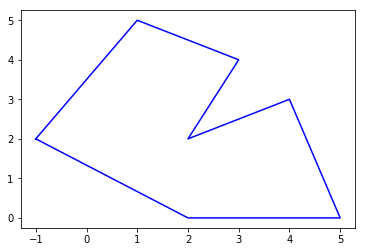

In [119]:
points_choice = np.array([[-1,2], [1,5], [3,4], [2,2], [4,3], [5,0], [2, 0]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
x_coords = [e[0] for e in points_for_plotting]
y_coords = [e[1] for e in points_for_plotting]
shape_from_points = plt.plot(x_coords, y_coords, 'b')

In [120]:
s = compute_signed_area_using_meisters_formula(points_choice)
s

-16.5

Everything still works. Nice. So what's next for us? Well how about curves, how about the paramtisations of points from curves. What kind of signed areas can we find?

### Curves

Let's start out as simply as possible. One the simplest curves we could consider is a parabola, which is paramatised by $y = x^2$. This is pretty straightfroward, and we could take three poinmts we can consider is the triangle and we know that we can use Meister's formula for the signed area and we can just plug in. But what is those points were on also satisfied soething else, say a parabola, like $y = x^2$ . 

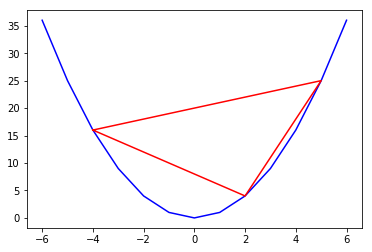

In [179]:

fig, ax = plt.subplots()
x2 = np.arange(start=-6, stop=7, step=1)
y2 = x2^2

points_choice = np.array([[-4,16], [2,4], [5,25]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'r')


In [178]:
s = compute_signed_area_using_meisters_formula(points_choice)
s

81.0

It works! Now what is we had  So if we had 3 integers, say $t_1, t_2$ and $t_3$, and they were paramatised as points on a parabola, so we were to get $[t_1,t_1^2], [t_2,t_2^2]$, and $[t_3,t_3^2]$ we would get

In [181]:
t_1, t_2, t_3 = sp.symbols('t_1, t_2, t_3')
points_choice = np.array([[t_1,t_1^2], [t_2,t_2^2], [t_3,t_3^2]])
s = compute_signed_area_using_meisters_formula(points_choice)
show(s)

-1/2*t_1^2*t_2 + 1/2*t_1*t_2^2 + 1/2*t_1^2*t_3 - 1/2*t_2^2*t_3 - 1/2*t_1*t_3^2 + 1/2*t_2*t_3^2

Ok, so what is this? A more complex looking version of Meister? But check out what happnes when we factor this, it turns into a digestible formula:

In [182]:
show(s.factor())

-1/2*(t_1 - t_2)*(t_1 - t_3)*(t_2 - t_3)

Finally, some collinearity, distincy, zero. These things don't. I have left this here, but to assure you that it is very powerful